

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
## The project conducted A/B testing of user conversions on an old and new wepage.
### The dateset attributes indcludes:
- Unique used ID
- Timestamp
- Group (control and treatment)
- landing page (old_page & new page)
- converted (boolen)



#### Part I - Probability

importing libraries.

In [15]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

Importing the dataset using pandas read function

In [35]:

df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Extracting general information about the data set 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Extracting number of unique id:

In [5]:
df.user_id.nunique()

290584

The proportion of users converted.

In [8]:
len(df.query('converted==1'))/len(df.index)

0.11965919355605512

Comparing the number of two pages in the dataset

In [9]:
df.query('group=="treatment" and landing_page != "new_page" or group=="control" and landing_page=="new_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

Checking for nulls

In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Creating "df2" to remove both of treatment and landing page != new page and control != old page

In [37]:
df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]

In [38]:
# Double Check all of the correct rows were removed
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Number of records on df2

In [39]:
df2.user_id.count()

290585

Checking for repeated records

In [40]:
df2[df2.duplicated(subset="user_id", keep=False)] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Removing the repeated values

In [41]:
df2 = df2.drop_duplicates()

Probability of conversion rate regardtheless which landing page has been used

In [43]:
convert_mean = df2.converted.mean()
convert_mean

0.11959667567149027

Probability of conversion for control group

In [44]:
control = df2[df2['group'] == 'control']['converted'].mean()
control

0.1203863045004612

Probability of conversion for treatment group

In [45]:
treat = df2[df2['group'] == 'treatment']['converted'].mean()
treat

0.11880724790277405

probability of receiving "new page"

In [46]:
new_page = (df2['landing_page'] == 'new_page').mean()
new_page

0.5000636646764286

##### From the data above we can conclude that the number of people who converted from each group is almost identical. There is no clear evidence. So we need to dig deeper and run A/B test to confirm.

<a id='ab_test'></a>
### Part II - A/B Test

To carry on with our A/B the null hypothesis should be identified.

In this case or null should be like this:

$$H_0: p_{new} \leq p_{old} $$ 

This means that the new page is euqal or less than the old one
 
TIMR TO CHECK OUT!

**conversion rate** for $p_{new}$ under the null

In [47]:
p_new=df2.converted.mean()
p_new

0.11959667567149027

**conversion rate** for $p_{old}$ under the nulL

In [48]:
p_old=df2.converted.mean()
p_old

0.11959667567149027

$n_{new}$, the number of individuals in the treatment group

In [49]:
n_new=df2.query('landing_page=="new_page"').count()[0]
n_new

145311

$n_{old}$, the number of individuals in the control group

In [50]:
n_old=df2.query('landing_page=="old_page"').count()[0]
n_old

145274

Simulation for $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [51]:
new_page = np.random.choice([0, 1], size=n_new, p=[(1 - p_old), p_old])

Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [53]:
old_page = np.random.choice([0, 1], size=n_old, p=[(1 - p_new), p_new])

 $p_{new}$ - $p_{old}$ 

In [57]:
pn_po = new_page.mean() - old_page.mean()
pn_po

6.606664764850778e-05

Bootstrapping
loop 10,000 $p_{new}$ - $p_{old}$ stored in **p_diffs**.

In [58]:
p_diffs = []

for i in range(10000):
    new_page = np.random.choice([0, 1], size=n_new, p=[(1 - p_old), p_old])
    old_page = np.random.choice([0, 1], size=n_old, p=[(1 - p_new), p_new])
    p_diffs.append(new_page.mean() - old_page.mean())

Plot a histogram of the **p_diffs**. 

Text(0, 0.5, 'Count')

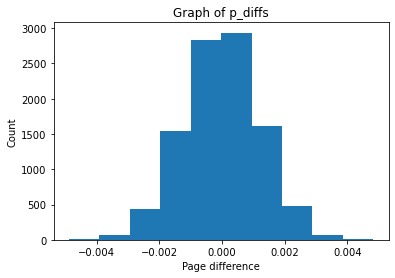

In [59]:
p_diffs=np.array(p_diffs)
#histogram of p_diff
plt.hist(p_diffs)
plt.title('Graph of p_diffs')#title of graphs
plt.xlabel('Page difference') # x-label of graphs
plt.ylabel('Count') # y-label of graphs

Proportion of **p_diffs** 

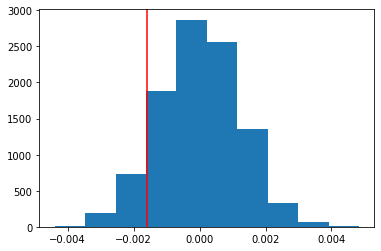

In [30]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs)
plt.axvline(treat - control, color='r');

In [31]:
obs_diff = treat - control

(p_diffs > obs_diff).mean()

0.9009


**Here we calculated the p-Value.to accept a null hypothesis p-value should be greater than the suggested p-value. the new page doesn't have better conversion rates than the old page because the value 0.9 is much higher than the alpha, 0.05. We fail to reject the null hypothesis**

Calculating p-value using statsmodels

In [72]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').count()[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').count()[0]
n_old = df2.query('landing_page=="old_page"').count()[0]
n_new = df2.query('landing_page=="new_page"').count()[0]

n_old

145274

`stats.proportions_ztest` to compute your test statistic and p-value.  

In [75]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')
print("p-value:", p_value)
print("Z_score:", z_score)

p-value: 0.905173705140591
Z_score: -1.3116075339133115


**A negative z-score and the value of p-value suggests that we can not reject the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

Since each row is either a conversion or no conversion, we should use **Logistic Regression**

- Add intercept column
- Add column for Dummy variables

In [76]:
df2['intercept']=1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


Using **statsmodels** to instantiate regression model on the two columns we created

In [77]:
import statsmodels.api as sm
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**The summary of the model**

In [78]:
from scipy import stats

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Oct 2020   Pseudo R-squ.:               8.085e-06
Time:                        01:30:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

re-modeling using countries that vists came from. using **countries** dataset

In [38]:
# merging both of datasets
df_count = pd.read_csv('countries.csv')
df_new = df_count.set_index('user_id').join(df2.set_index('user_id'), how='inner')


In [39]:
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1


In [40]:
# using countries as independent variable this time
df_new['intercept'] = 1
log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US', 'intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 May 2020   Pseudo R-squ.:               2.324e-05
Time:                        06:14:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.744      0.457      -0.036       0.016
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
==============================================================================
"""

# Conclusions:
 Based on the results above, It shows us that the new page does not provide any added value so we fail to reject the null hypothesis. This is very clear in the hist. 
 
From the countries regression above we see that the p-value for Us is higher than Canda, which means that users in the US are more likely to convert. Nevertheless this is not evidence to reject the null hypothesis.